In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/titanic.csv')

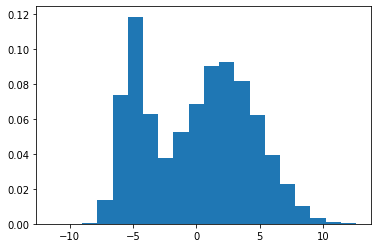

[[-4.92779492]
 [ 2.19058994]]
[[[1.14316441]]

 [[8.24570487]]]
[0.31624375 0.68375625]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

# Generate data samples and plot its histogram
# 1 in x_1 is standard deviation, 1^2 is its variance: -5 is its mean
x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000)
x = np.concatenate((x_1, x_2))
plt.hist(x, bins=20, density=1)
plt.show()

gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(x.reshape(-1,1))
print(gmm.means_)
print(gmm.covariances_)
print(gmm.weights_)


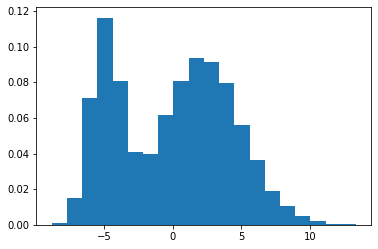

In [13]:
z = gmm.sample(10000)
plt.hist(z[0], bins=20, density=1)
plt.show()

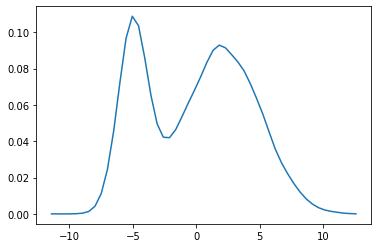

In [14]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.6)
kde.fit(x.reshape(-1,1))

s = np.linspace(np.min(x), np.max(x))
log_pdf = kde.score_samples(s.reshape(-1,1))
plt.plot(s, np.exp(log_pdf))

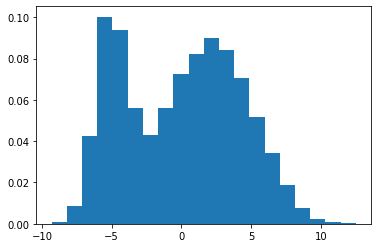

In [23]:
m = kde.sample(10000)
plt.hist(m, bins=20, density=1)
plt.show()

In [36]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import scipy.stats

df = pd.read_csv('datasets/Iris.csv')
df = df.drop(columns=['Id', 'Species'])

#X = SepalLengthCm Y = PetalLengthCm
def corr_between(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = sum([((i-x_mean)*(j-y_mean)) for i,j in zip(x,y)])
    den1 = sum([((i-x_mean)**2) for i in x])
    den2 = sum([((j-y_mean)**2) for j in y])
    den = np.sqrt(den1) * np.sqrt(den2)
    
    return num/den

    
x = df['SepalLengthCm']
y = df['PetalLengthCm']
print(corr_between(x,y))

0.8717541573048717


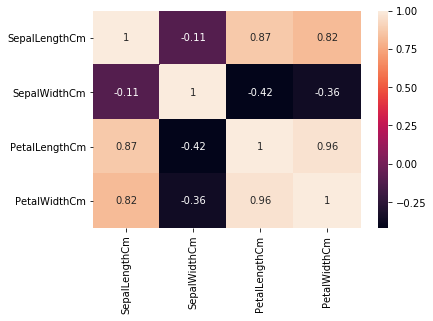

In [39]:
#6 unique combinations
sns.heatmap(df.corr(), annot=True)